Задание 1. Анализ Titanic

Цель: исследовать набор данных и визуализировать базовые зависимости.

    Загрузите датасет Titanic (через ссылку или seaborn.load_dataset('titanic')).
    Постройте 3 разных типа графиков (на выбор: barplot, histplot, boxplot, countplot, scatterplot).
    Каждый график должен отвечать на конкретный вопрос, например:
        Сколько мужчин и женщин было на борту?
        Как распределяется возраст по классам?
        Есть ли связь между стоимостью билета и выживаемостью?

Подсказка: используйте подписи осей, заголовки (plt.title) и добавьте короткие выводы в текстовой ячейке Markdown.

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import  matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv"
tit = pd.read_csv(url)
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


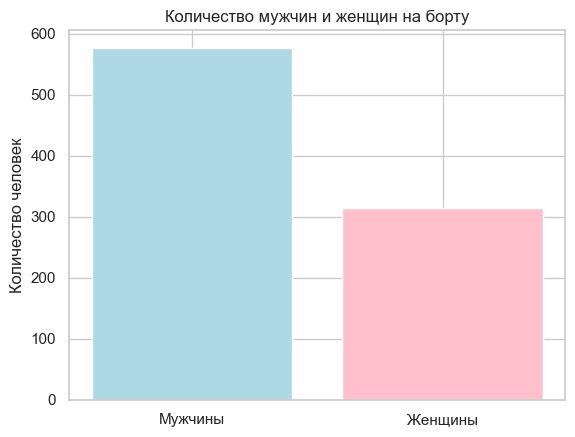

In [105]:
male = tit['Sex'].value_counts()["male"]
female = tit['Sex'].value_counts()["female"]
object = ["Мужчины","Женщины"]
perfomance = [male,female]
plt.title("Количество мужчин и женщин на борту")
plt.ylabel("Количество человек")
plt.bar(object, perfomance, color=["LightBlue","Pink"])
plt.show()

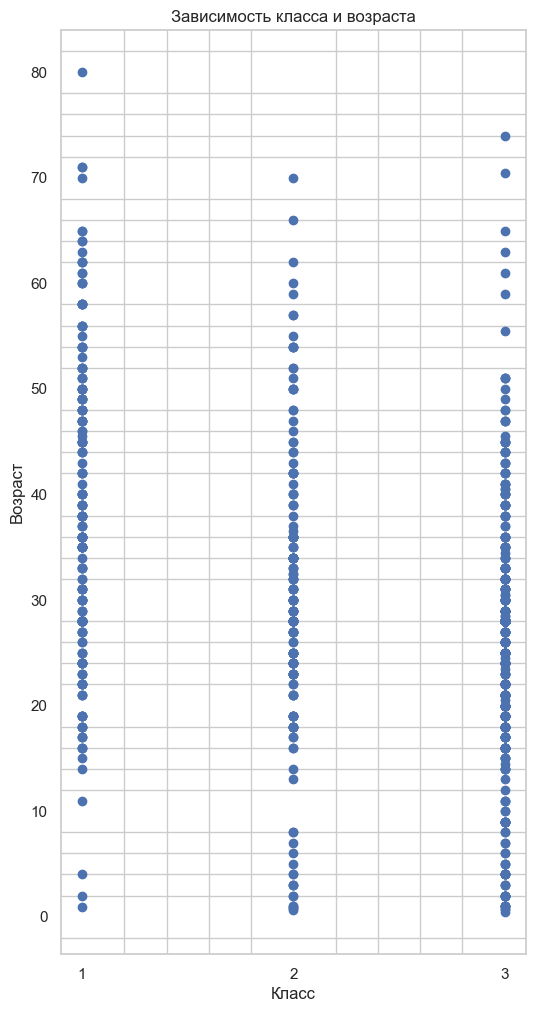

In [106]:
tit['Age'] = tit['Age'].fillna(tit['Age'].median()) #Заполнить возраст медианным значением

plt.figure(figsize=(6,12))
plt.minorticks_on() #отображение сетки по нецелым значениям
plt.grid(which='major')
plt.grid(which='minor')
plt.scatter(tit['Pclass'], tit['Age'])
plt.xticks(np.arange(1, 4, 1)) # удаление промежуточных значений между числовыми значениями классов
plt.xlabel('Класс')
plt.ylabel('Возраст')
plt.title('Зависимость класса и возраста')
plt.show()

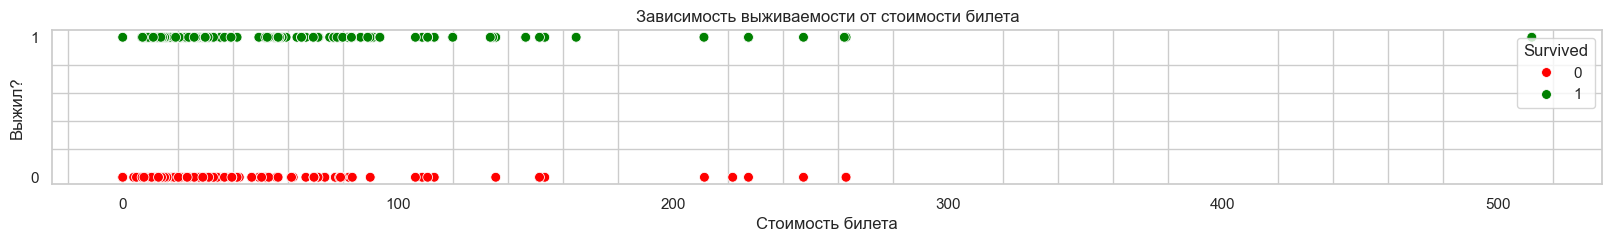

In [107]:
plt.figure(figsize=(20, 2))
sns.scatterplot(
    x='Fare', 
    y='Survived', 
    data=tit, 
    hue='Survived', # Раскрашиваем точки в зависимости от статуса выживания
    palette={0: 'red', 1: 'green'},
    s=50, # Размер точек
    alpha=1 # Прозрачность
)
plt.title('Зависимость выживаемости от стоимости билета')
plt.xlabel('Стоимость билета')
plt.ylabel('Выжил?')
plt.yticks([0, 1])
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor')
plt.show()

Задание 2. Сравнение библиотек Matplotlib и Seaborn

Цель: понять, как отличаются подходы двух библиотек.

    Постройте один и тот же график (например, распределение возраста пассажиров)
    сначала с помощью matplotlib, затем с помощью seaborn.
    Сравните код — что проще? где понятнее результат?
    Добавьте короткий комментарий с вашим мнением.


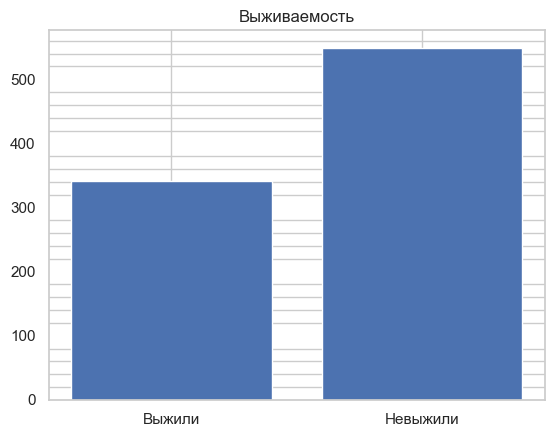

In [112]:
#Через matplotlib

surv_0 = tit['Survived'].value_counts()[0]
surv_1 = tit['Survived'].value_counts()[1]
plt.bar(["Выжили","Невыжили"],[surv_1,surv_0])
plt.minorticks_on()
plt.title("Выживаемость")
plt.grid(which="major", axis="y")
plt.grid(which="minor", axis="y")
plt.show()

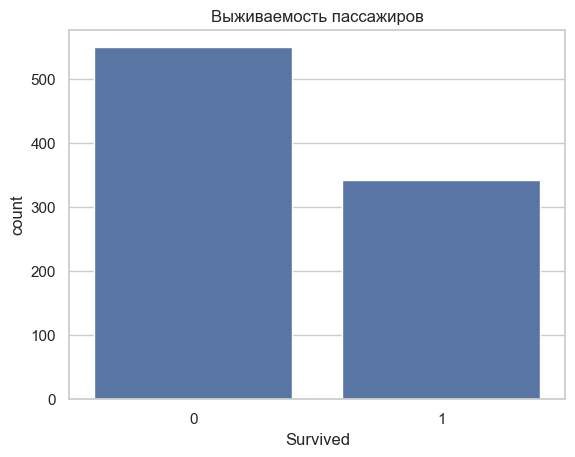

In [116]:
#Через seaborn

sns.set(style="whitegrid")
sns.countplot(x='Survived', data=tit)
plt.title("Выживаемость пассажиров")
plt.show()

Seaborn локаничнее и проще, но matplotlib более тонкий в настройке (по личным впечатлениям)